## **Pesquisa de Mercado - Restaurantes na Cidade de Los Angeles** 
### **Market Research - Los Angeles Restaurants**

**Clara Álvares Camargo**  
Agosto/2024

## **Sumário**  
  
1. Leitura dos dados
  
1.0. Carregando os dados  
1.1. Visualização dos dados  
1.2. Tratamento dos dados   
1.3. Visualização dos dados pós processamento  
  
2. Análise dos dados  
  
2.1. Tipos de restaurantes  
2.1.1. Distribuição dos restaurantes por tipo  
2.1.2. Quantidade média de assentos por tipo de restaurante  
  
2.2. Estabelecimentos de rede  
2.2.1. Proporção de estabelecimentos de rede vs. independentes  
2.2.2. Distribuição de restaurantes de rede por tipo  
2.2.3 Relação entre quantidade de estabelecimentos e quantidade de assentos por rede  
  
2.3. Localidade  
2.3.1. Top 10 ruas com maior número de restaurantes  
2.3.2. Quantidade de ruas com apenas 1 restaurante  
2.3.3. Distribuição do número de assentos para as top 10 ruas  
  
3. Conclusões

## 0. Bibliotecas

In [2]:
# importando bibliotecas

import pandas as pd
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

## 1.Leitura dos dados

### 1.0 Carregando os dados

In [3]:
# carregando os dados

restaurant_data = pd.read_csv('./rest_data_us_upd.csv')

### 1.1 Visualização dos dados

In [4]:
# visualizando os dados

restaurant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [5]:
# visualizando os dados

restaurant_data.head()

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [6]:
# visualizando os dados

restaurant_data.tail()

,id,object_name,address,chain,object_type,number
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6
9650,21436,CAFE SPROUTS,1300 S SAN PEDRO ST STE 111,True,Restaurant,19


### 1.2 Tratamento dos dados

In [7]:
# conferindo se há linhas duplicadas

restaurant_data.duplicated().sum()

0

In [8]:
# conferindo se há valores nulos

restaurant_data.isnull().sum()

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

In [9]:
# visualizando linhas onde há valores nulos

linhas_com_nulos = restaurant_data[restaurant_data.isnull().any(axis=1)]
linhas_com_nulos

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,NaN,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,NaN,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,NaN,Restaurant,35


In [10]:
# substitiuindo valores nulos

restaurant_data['chain'] = restaurant_data['chain'].fillna('unknown')

In [11]:
# visualizando linhas onde havia valores nulos

linhas_sem_nulos = restaurant_data.iloc[[7408, 7523, 8648]]
linhas_sem_nulos

,id,object_name,address,chain,object_type,number
7408,19194,TAQUERIA LOS 3 CARNALES,5000 E WHITTIER BLVD,unknown,Restaurant,14
7523,19309,JAMMIN JIMMY'S PIZZA,1641 FIRESTONE BLVD,unknown,Pizza,1
8648,20434,THE LEXINGTON THEATER,129 E 3RD ST,unknown,Restaurant,35


In [12]:
# conferindo se há valores nulos

restaurant_data.isnull().sum()

id             0
object_name    0
address        0
chain          0
object_type    0
number         0
dtype: int64

In [13]:
# renomeando colunas

restaurant_data = restaurant_data.rename(columns={'object_name': 'name', 'object_type': 'type'})

### 1.3 Visualização dos dados

In [14]:
restaurant_data.head()

,id,name,address,chain,type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


## 2. Análise dos dados

### **2.1 Tipos de restaurantes**

#### 2.1.1 **Distribuição dos restaurantes por tipo**

##### 2.1.1.0 Preparação dos dados

In [15]:
# agrupando dados por tipo de estabelecimento

type_distribution = restaurant_data.groupby('type').size().reset_index(name='count')
type_distribution

,type,count
0,Bakery,283
1,Bar,292
2,Cafe,435
3,Fast Food,1066
4,Pizza,320
5,Restaurant,7255


##### 2.1.1.1 Gráfico

In [16]:
# imprimindo gráfico de pizza

fig = px.pie(type_distribution, values='count', names='type', 
             title='Distribuição de Restaurantes por Tipo', 
             hole=0.3)
fig.show()

##### 2.1.1.2 Anotações

Domínio de Restaurantes Tradicionais:  
Predominância de estabelecimentos classificados como "Restaurantes" (75,2%).  
*Tal fato pode se dar pelo caráter genérico da classificação, que acaba por englobar uma variedade maior de estabelecimentos.
  
Popularidade de Fast Food:  
O segundo maior segmento é o de "Fast Food", representando 11% do total. Isso sugere que há uma demanda considerável por refeições rápidas.  
  
Diversidade de Outros Tipos de Estabelecimentos:  
Os outros tipos de estabelecimentos ("Café", "Pizza", "Bar", e "Bakery") representam uma parcela muito menor, cada um com menos de 5% do total. Isso pode indicar que, embora exista uma variedade de opções, esses segmentos ainda são nichos em comparação com os restaurantes e fast food.

Segmentos de Nicho:  
"Café", "Pizza", "Bar", e "Bakery" juntos compõem aproximadamente 14% do mercado. Esses nichos podem atrair clientes com preferências específicas.

Essa distribuição aponta os tipos de estabelecimento mais populares, mas pode indicar oportunidades de negócio em segmentos menos saturados.

#### 2.1.2 **Quantidade média de assentos por tipo de restaurante**

##### 2.1.2.0 Preparação dos dados

In [17]:
# agrupando restaurantes por tipo e calculando quantidade média de assentos 

type_restaurants_grouped = restaurant_data.groupby('type').agg(
    mean_seats=('number', 'mean'),
    ).reset_index()

type_restaurants_grouped

,type,mean_seats
0,Bakery,21.773852
1,Bar,44.767123
2,Cafe,25.000000
3,Fast Food,31.837711
4,Pizza,28.459375
5,Restaurant,48.042316


##### 2.1.2.1 Gráfico

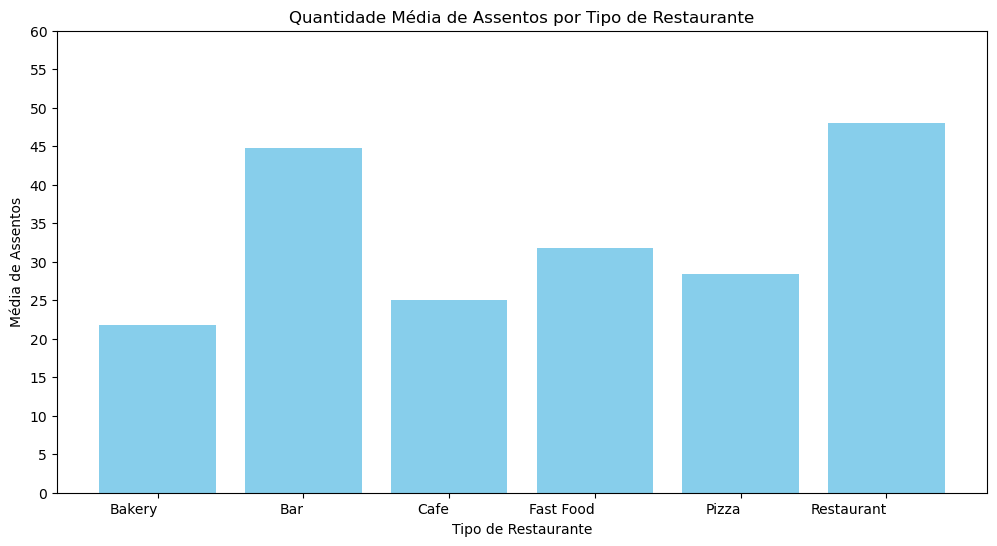

In [18]:
# imprimindo gráfico de barras

plt.figure(figsize=(12, 6))
plt.bar(type_restaurants_grouped['type'], type_restaurants_grouped['mean_seats'], color='skyblue')
plt.title('Quantidade Média de Assentos por Tipo de Restaurante')
plt.xlabel('Tipo de Restaurante')
plt.ylabel('Média de Assentos')
plt.xticks(rotation=0, ha='right')
plt.yticks(range(0, 65, 5))
plt.show()

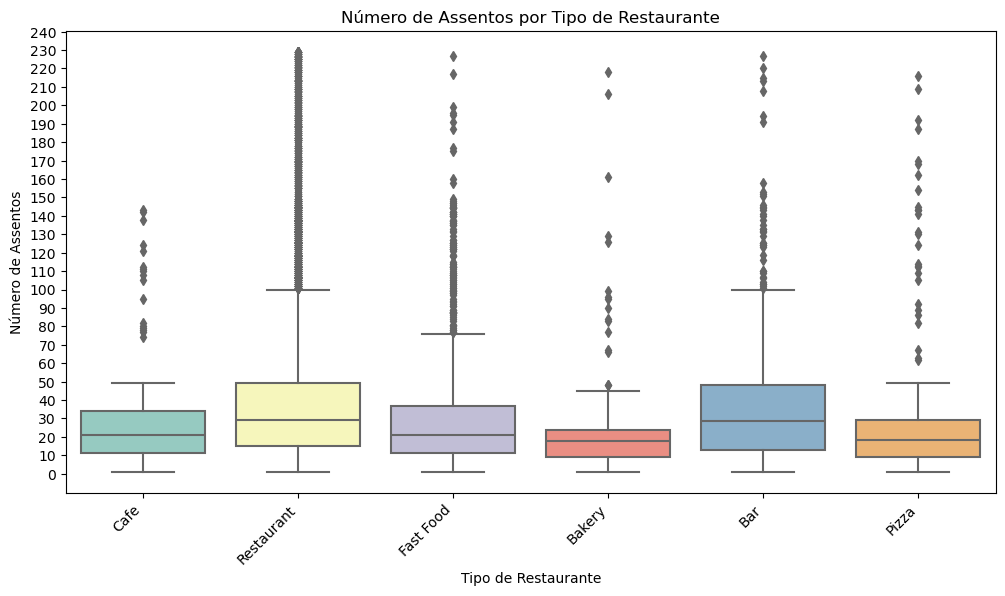

In [19]:
# imprimindo boxplot

plt.figure(figsize=(12, 6))
sns.boxplot(x='type', y='number', data=restaurant_data, palette='Set3')
plt.title('Número de Assentos por Tipo de Restaurante')
plt.xlabel('Tipo de Restaurante')
plt.ylabel('Número de Assentos')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 250, 10))
plt.show()

##### 2.1.2.2 Anotações

Restaurantes e bares são as categorias com maior média de número de assentos, seguidos por fast foods e pizzarias. Por último estão os cafés e padarias.  
Podemos identificar algumas tendências:  
estabelecimentos das categorias "Restaurant" e "Bar" tem média entre 40 e 50 assentos;  
estabelecimentos de nicho como "Bakery", "Cafe" e "Pizza" tem média entre 20 e 30 lugares.

Olhando para a ditribuição do número de assentos por meio do boxplot, pode-se observar:

Cafe: Apresenta uma mediana por volta de 20 assentos, com a maioria dos estabelecimentos tendo entre 10 e 40 assentos. Há alguns outliers com um número de assentos acima de 100, mas em comparação com as demais categorias, é a que menos possui valores atípicos.

Restaurant: Tem uma mediana de assentos por volta de 30, com uma distribuição mais ampla. Sua média muito superior às demais categorias se deve à presença de numerosos outliers, com alguns restaurantes possuindo mais de 230 assentos.

Fast Food: A mediana esta em torno de 20, mas com menos outliers e uma distribuição de valores mais concentrada.

Bakery: Possui uma mediana em torno de 20 assentos, e menos variabilidade em comparação com outros tipos de restaurantes. Há alguns outliers, alguns ultrapassando 200 assentos.

Bar: Mostra uma mediana em torno de 30 assentos, com uma distribuição de valores ampla e alguns outliers significativos.

Pizza: Tem uma mediana em torno de 20 assentos e uma variabilidade moderada, com alguns outliers.

Outliers: Existem muitos outliers em quase todas as categorias, principalmente em "Restaurant", "Bar", e "Pizza", indicando que alguns desses estabelecimentos possuem significativamente mais assentos do que a maioria.

### **2.2 Estabelecimentos de rede**

#### 2.2.1 **Proporção de estabelecimentos de rede vs. independentes**

##### 2.2.1.0 Preparação dos dados

In [20]:
# agrupando dados por estabelecimento de rede vs estabelecimentos independentes
 
chain_distribution = restaurant_data.groupby('chain').size().reset_index(name='count')
chain_distribution

,chain,count
0,False,5972
1,True,3676
2,unknown,3


##### 2.2.1.1 Gráfico

In [21]:
# imprimindo gráfico

fig = px.pie(chain_distribution, values='count', names='chain', 
             title='Proporção de Estabelecimentos de Rede vs. Independentes', 
             hole=0.3)
fig.show()

##### 2.2.1.2 Anotações

A maior parte dos restaurantes analisados não são de rede - 61,9%.

#### 2.2.2 **Distribuição de restaurantes de rede por tipo**

##### 2.2.2.0 Preparação dos dados

In [22]:
# filtrando dados dos estabelecimentos de rede

chain_restaurants = restaurant_data[restaurant_data['chain'] == True]
chain_restaurants.head()

,id,name,address,chain,type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26


In [23]:
# agrupando restaurantes de rede por tipo

chain_rest_types = chain_restaurants.groupby('type').size().reset_index(name='count')
chain_rest_types

,type,count
0,Bakery,283
1,Bar,77
2,Cafe,266
3,Fast Food,605
4,Pizza,153
5,Restaurant,2292


##### 2.2.2.1 Gráfico

In [24]:
# imprimindo gráfico

fig = px.pie(chain_rest_types, values='count', names='type', 
             title='Distribuição de Restaurantes de Rede por Tipo', 
             hole=0.3)
fig.show()

##### 2.2.2.2 Anotações

Dentre os restaurantes de rede a maior parte pertence à categoria "Restaurant" - 62.4%.  
Em segundo lugar estão os fastfoods - 16.5%.  
Seguem no ranqueamento os estabelecimentos classificados como "Bakery", "Café", "Pizza".  
"Bar" é o segmento com menor representatividade entre os restaurantes de rede.  
  
Em se considerando que "Restaurant" é uma categoria genérica que pode englobar vários gêneros de restaurantes, é possível inferir que o segmento com maior força dentre os estabelecimentos de rede sejam os fastfoods.

#### 2.2.3 **Relação entre quantidade de estabelecimentos e quantidade de assentos por rede**

##### 2.2.3.0 Preparação dos dados

In [25]:
# agrupando restaurantes da mesma rede e contando quantidade de estabelecimentos e número médio de assentos

chain_restaurants_grouped = chain_restaurants.groupby('name').agg(
    total_restaurants=('id', 'size'),
    mean_seats=('number', 'mean')
    ).reset_index()

chain_restaurants_grouped.head()

,name,total_restaurants,mean_seats
0,#1 CHINESE FAST FOOD,1,6.0
1,1810 RESTAURANT,1,45.0
2,333,1,180.0
3,3RD ST MARKET & DELI,1,7.0
4,4 CAMINOS RESTAURANT,1,18.0


##### 2.2.3.1 Gráfico

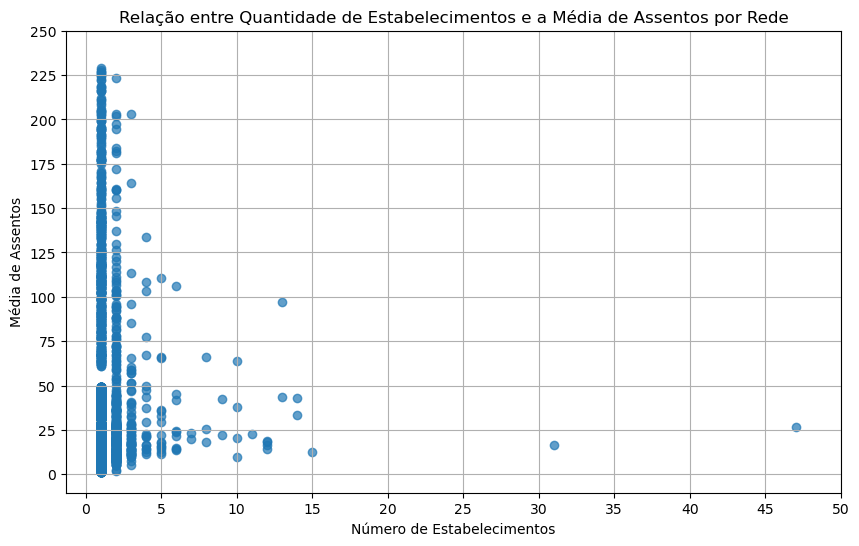

In [26]:
# criando gráfico de dispersão

plt.figure(figsize=(10, 6))
plt.scatter(chain_restaurants_grouped['total_restaurants'], chain_restaurants_grouped['mean_seats'], alpha=0.7)
plt.title('Relação entre Quantidade de Estabelecimentos e a Média de Assentos por Rede')
plt.xlabel('Número de Estabelecimentos')
plt.ylabel('Média de Assentos')
plt.xticks(range(0, 51, 5))
plt.yticks(range(0, 275, 25))
plt.grid(True)
plt.show()

##### 2.2.3.2 Anotações

A maioria dos pontos se concentra no canto inferior esquerdo do gráfico, indicando que a maior parte das redes tem um pequeno número de estabelecimentos.  
As redes que possuem até 5 estabelecimentos, tem uma variabilidade maior na quantidade de assentos, indo de 1 chegando a ultrapassar 225 lugares.  
À medida que o número de estabelecimentos aumenta, há uma tendência de diminuição da média de assentos.  
Algumas redes fogem ao padrão, com um número elevado de estabelecimentos, ultrapassando 30, estes possuem uma média de assentos mais baixa, de até 25 assentos.  
O gráfico sugere uma relação inversa entre o número de estabelecimentos e a média de assentos, onde redes com mais estabelecimentos tendem a ter uma média de assentos menor.  

### **2.3 Localidade**

### 2.3.1 **Top 10 ruas com maior número de restaurantes**

#### 2.3.1.0 Preparação dos dados

In [27]:
# extraindo o nome da rua da coluna 'adress'

restaurant_data['street_name'] = restaurant_data['address'].str.split(' ', n=1).str[1]
restaurant_data.head()

,id,name,address,chain,type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY 120
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD 253
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE


In [28]:
# agrupando restaurantes por rua e contando quantidade de estabelecimentos e média de assentos

street_restaurants_grouped = restaurant_data.groupby('street_name').agg(
    total_restaurants=('id', 'size'),
    mean_seats=('number', 'mean')
    ).reset_index()

street_restaurants_grouped.head()

,street_name,total_restaurants,mean_seats
0,1/2 3RD ST,1,19.000000
1,1/2 7TH ST,1,49.000000
2,1/2 BEVERLY BLVD,3,28.666667
3,1/2 CITY TERRACE DR,1,1.000000
4,1/2 COLORADO BLVD,1,25.000000


In [29]:
# selecionando 10 ruas com maior número de restaurantes

top_10_streets = street_restaurants_grouped.sort_values(by='total_restaurants', ascending=False).head(10)

In [30]:
# filtrando dados das top 10 ruas com maior número de restaurantes

top_10_streets_data = restaurant_data[restaurant_data['street_name'].isin(top_10_streets['street_name'])]

#### 2.3.1.1 Gráfico

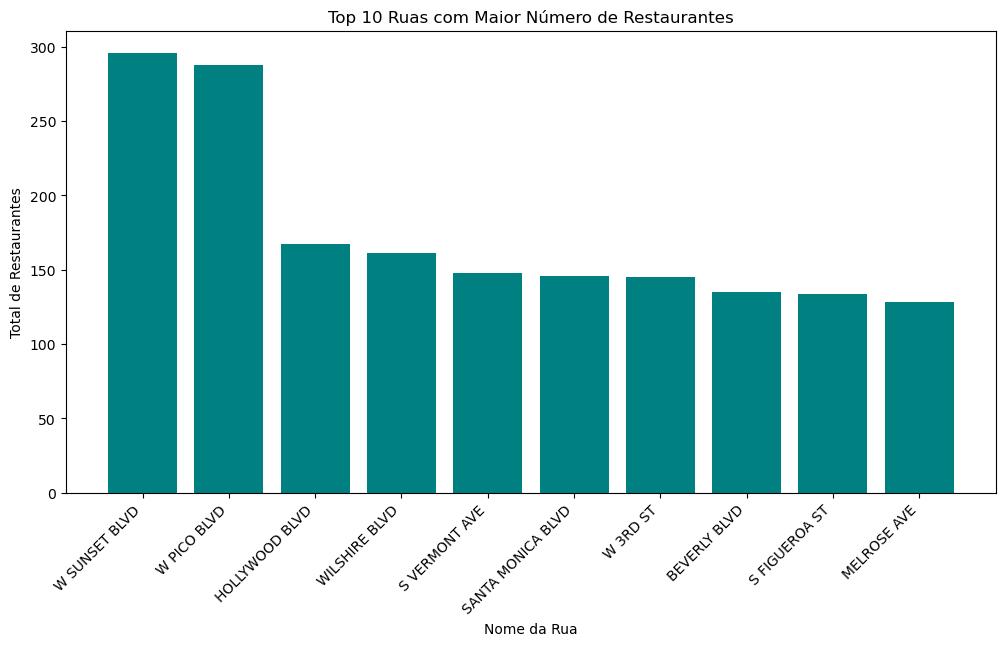

In [31]:
# imprimindo gráfico de barras

plt.figure(figsize=(12, 6))
plt.bar(top_10_streets['street_name'], top_10_streets['total_restaurants'], color='teal')
plt.title('Top 10 Ruas com Maior Número de Restaurantes')
plt.xlabel('Nome da Rua')
plt.ylabel('Total de Restaurantes')
plt.xticks(rotation=45, ha='right')
plt.show()

#### 2.3.1.2 Explorações

In [32]:
# calculando total de restaurantes somando as top10 ruas

total_rest_top10 = top_10_streets['total_restaurants'].sum()
total_rest_top10

1748

In [33]:
# calculando total de restaurantes em todas as ruas analisadas

total_restaurants = street_restaurants_grouped['total_restaurants'].sum()
total_restaurants

9651

In [34]:
# calculando a proporção de restaurantes concentrados nas top10 ruas

proportion_top10 = round((total_rest_top10 / total_restaurants)*100,1)
proportion_top10

18.1

#### 2.3.1.3 Anotações

As 10 ruas principais concentram quase um quinto (18,1%) do total de restaurantes analisados.  
W Sunset Blvd e W Pico Blvd são as ruas com o maior número de restaurantes, com aproximadamente 300 cada. As demais ruas possuem todas mais de 100 restaurantes.  
A concentração de restaurantes nessas ruas pode indicar regiões com alta demanda gastronômica ou áreas comerciais populares.  

### 2.3.1 **Quantidade de ruas com apenas 1 restaurante**

#### 2.3.2.0  Preparação dos dados

In [35]:
# selecionando ruas com apenas 1 restaurante

one_rest_streets = street_restaurants_grouped[street_restaurants_grouped['total_restaurants'] == 1]
one_rest_streets_count = one_rest_streets.shape[0]

In [36]:
# calculando proporção das ruas com apenas 1 restaurante

total_streets = street_restaurants_grouped.shape[0]
proportion = round((one_rest_streets_count / total_streets)*100,1)

#### 2.3.2.1  Resultados

In [37]:
print(f'Quantidade de ruas com apenas um restaurante:',one_rest_streets_count,'.')
print(f'As ruas com 1 restaurante representam', f'{proportion}%', 'do total de ruas com restaurantes.')

Quantidade de ruas com apenas um restaurante: 2450 .
As ruas com 1 restaurante representam 79.6% do total de ruas com restaurantes.


#### 2.3.2.2  Anotações

As ruas com apenas 1 restaurante representam 79.6% do total de ruas analisadas.

Oportunidades de mercado: Essas ruas com apenas um restaurante podem representar oportunidades de expansão, especialmente se forem áreas em crescimento ou com potencial para atrair mais clientes. A baixa concorrência pode ser um atrativo, dependendo do público-alvo e da estratégia do negócio.
Restaurantes localizados em ruas onde são os únicos estabelecimentos podem ter uma vantagem em termos de visibilidade e atração de clientela, mas também podem enfrentar desafios relacionados à falta de um "ecossistema" gastronômico que poderia atrair mais visitantes para a área.

### 2.3.3 **Distribuição do número de assentos para as top 10 ruas**

#### 2.3.3.0 Preparação dos dados

In [38]:
# ordenando DataFrame para seguir a ordem de ruas com maior numero de restaurantes

# contando o número de ocorrências de cada 'street_name'
street_count_order = top_10_streets_data['street_name'].value_counts()

# ordenando o DataFrame de acordo com o número de ocorrências de 'street_name'
top_10_streets_data = top_10_streets_data.set_index('street_name').loc[street_count_order.index].reset_index()


#### 2.3.3.1 Gráficos

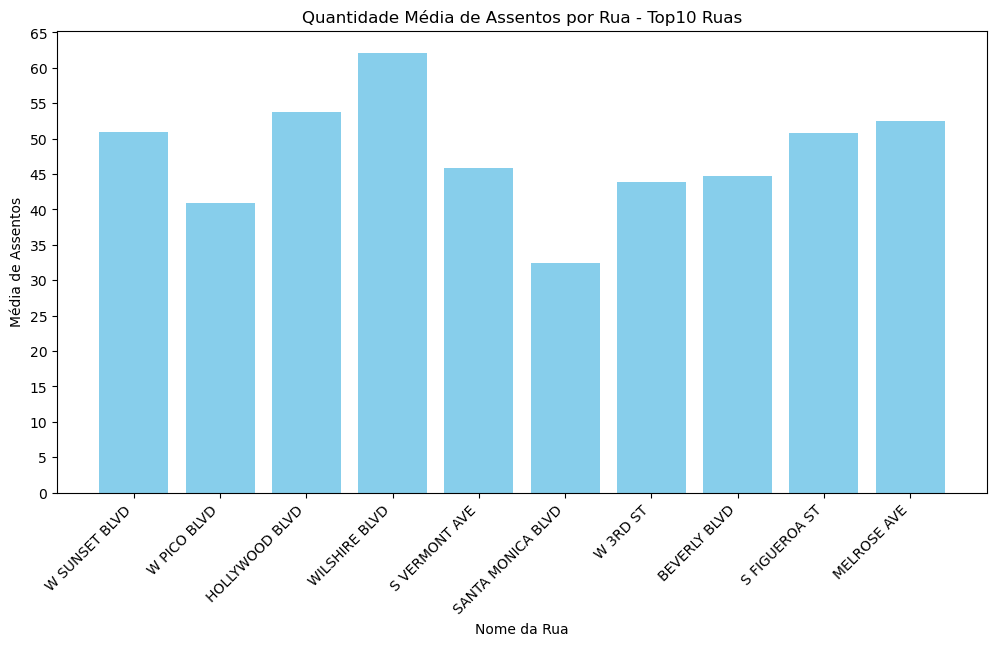

In [39]:
# imprimindo gráfico de barras com média de assentos por rua

plt.figure(figsize=(12, 6))
plt.bar(top_10_streets['street_name'], top_10_streets['mean_seats'], color='skyblue')
plt.title('Quantidade Média de Assentos por Rua - Top10 Ruas')
plt.xlabel('Nome da Rua')
plt.ylabel('Média de Assentos')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 70 ,5))
plt.show()

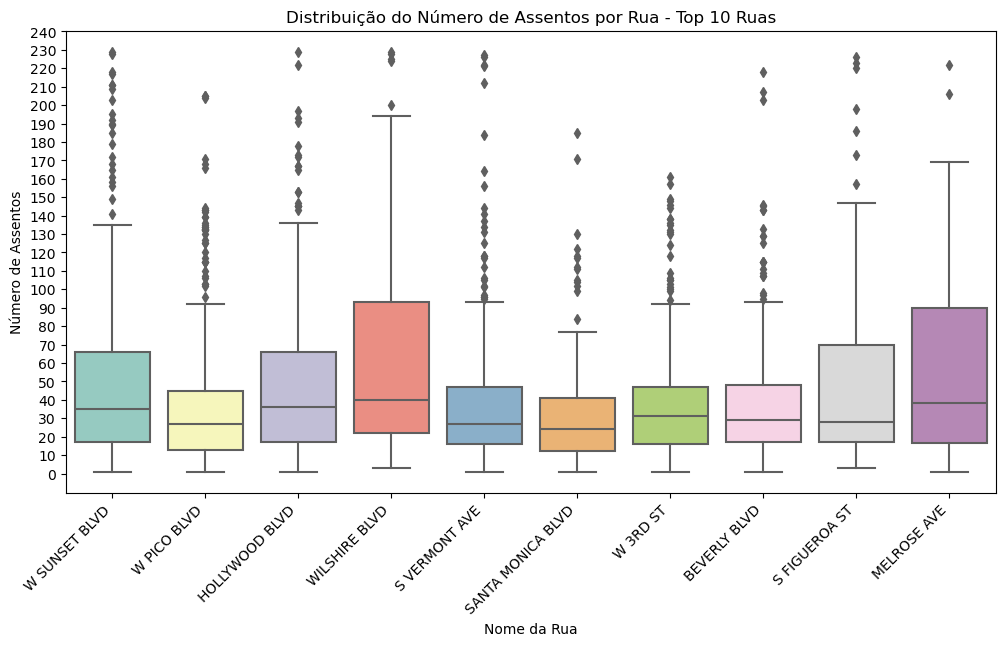

In [40]:
# imprimindo boxplot para as top 10 ruas com maior número de restaurantes

plt.figure(figsize=(12, 6))
sns.boxplot(x='street_name', y='number', data=top_10_streets_data, palette='Set3')
plt.title('Distribuição do Número de Assentos por Rua - Top 10 Ruas')
plt.xlabel('Nome da Rua')
plt.ylabel('Número de Assentos')
plt.xticks(rotation=45, ha='right')
plt.yticks(range(0, 250, 10))
plt.show()

#### 2.3.3.1 Anotações

W Sunset Blvd e Holywood Blvd:  
média de assentos elevada - superior a 50, mediana em torno de 35, grande variabilidade e muitos outliers com valores muito elevados, entre 135 e 230 lugares.
  
W Pico Blvd:  
média em torno de 40 (a segunda menor), mediana em torno de 25, menor variabiidade, muitos outliers, com alguns estabelecimentos com mais de 200 lugares.
  
Wilshire Blvd e Melrose Ave:  
média de assentos elevada - superior a 50, mediana em torno de 40, grande variabilidade e alguns outliers, com restaurantes chegando a mais de 230 lugares.
  
S Vermont Ave e Beverly Blvd:  
média em torno de 40, mediana em torno de 25, menor variabilidade e muitos outliers, com restaurantes chegando a mais de 230 lugares.
  
Santa Monica Blvd:  
menor média - em torno de 30, mediana em torno de 20, menor variabiidade, muitos outliers, com alguns estabelecimentos com mais de 100 lugares, mas nenhum ultrapassando 200.
  
W 3rd St:  
média em torno de 45, mediana em torno de 35, menor variabilidade, alguns outliers, com alguns estabelecimentos com mais de 100 lugares, mas nenhum ultrapassando 200.
  
S Figueroa St:  
média de assentos elevada - superior a 50, mediana em torno de 30, grande variabilidade e alguns outliers com valores muito elevados, entre 135 e 230 lugares.
  
  
A média de assentos varia bastante entre as 10 principais ruas, as ruas com menor média girando em torno de 30 e as com média mais elevada em torno de 60 assentos.
A distribuição dos assentos nas ruas analisadas é bastante heterogênea. Algumas ruas, como Wilshire Blvd, têm grande variabilidade, enquanto outras, como W 3rd St e S Vermont Ave, apresentam distribuições mais uniformes. A presença de muitos outliers em ruas como Hollywood Blvd e Beverly Blvd sugere a existência de locais específicos com quantidades de assentos muito diferentes da maioria.

## 3.Conclusões

**Conclusão Geral:**  
O mercado de restaurantes em Los Angeles é dominado por estabelecimentos tradicionais e fast foods, que juntos representam a grande maioria dos negócios na cidade.  
**Estabelecimentos de nicho, como cafés e padarias, ocupam uma parcela menor do mercado, mas ainda atraem um público específico.**  
A análise revela que a maioria dos restaurantes possui entre 20 e 50 assentos, com variações significativas dependendo do tipo de estabelecimento e da localização.  

A alta concentração de restaurantes em ruas específicas sugere áreas de alta demanda e competitividade, enquanto as ruas com apenas um restaurante podem representar oportunidades de expansão para novos negócios.  


**Recomendações:**  
  
**Tipo de Restaurante:**  
Dado o domínio de restaurantes tradicionais e fast foods, **uma cafeteria com garçons robôs se posiciona como um negócio de nicho inovador**, que pode atrair clientes interessados em experiências únicas. No entanto, para garantir longevidade após a novidade inicial, é crucial oferecer um diferencial adicional, como um cardápio exclusivo ou um ambiente temático que mantenha o interesse dos clientes.  
  
**Número de Assentos:**  
Considerando a distribuição média de assentos em cafés e a necessidade de um ambiente aconchegante, recomenda-se um espaço com cerca de 20 a 30 assentos. Esse número é suficiente para criar um ambiente intimista, mas sem limitar a capacidade de atender a um fluxo moderado de clientes, mantendo a competitividade com outros estabelecimentos do mesmo nicho. 

**Localidade:**  
A análise da distribuição de restaurantes aponta regiões com alta demanda gastronômica ou áreas comerciais populares. Estas podem ser áreas propícias para a implementação incial do negócio, facilitando a visibilidade do estabelecimento e garantindo um fluxo de clientela.
  
**Possibilidade de Expansão para uma Rede:**  
A criação de uma rede de cafeterias robóticas pode ser viável, permitindo a possibilidade de explorar áreas consideradas polos gastronômicos e áreas com baixa concorrência ou ruas com poucos estabelecimentos gastronômicos em paralelo. A análise sugere que redes menores, com menos estabelecimentos, podem operar com um número menor de assentos, permitindo uma expansão controlada e foco na experiência do cliente.    
  
